import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
## 1. Objective of the proposed research:

As the Data Scientist for Target Online Store my main objective of the proposed research is to
provide insights for target advertisements team to improve their online sales which is relatively a
new platform. Target advertisements might help to increase the online sales as it focuses on the
behavioural, attitude and demographical features of the customer.  

Target Corporation is the eighth-largest retailer in US.[source:wikipedia]. Target currently has
40 distribution centres across the United States alone through which they cater to their needs
of stores and online purchases made by customer. Similarly, they have many centres across the
world. It is therefore required to have an efficient stocking, especially in online sales, of materials
as stocking incurs additional cost. Target advertisment is the best method to cope up with this, as
it will help us to give customers with suggestions that they are most likely to buy. It will increase
the sales without having to stock on items seldom sold.  

The dataset provided with has information about items(description), stock code, customerID,
quantity purchased for each item and unit price along with other minor informations. The objective
of the research will be achieved by the method of clustering. Different types of clustering will
be performed to optimize the study.By end of this study, if a new product is added to the stock, a
prediction on how frequently it will be purchased by a customer can be inferred.

## 2. Data Exploration

Importing the pandas and numpy libraries for working on arrays and data frames and renaming
as pd and np for easy naming convention.  

In [1]:
#Loading the data file Online Retail in to data frame df.

import pandas as pd
df = pd.read_csv("./Data/Online Retail.csv")

In [2]:
# reading the first five rows of the dataframe

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#reading the meta data of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# Reading the quick stats of the dataframe df using the function describe()

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# Reading the number of rows and columns the data frame df using function shape.

df.shape

(541909, 8)

## 3. Data Pre Processing

In [6]:
# Checking the Na values in the data frame df using the function isnull().

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We can obderve that there are many null values in the __customer ID__ column but we cannot remove them, customer ID ins necessary for sending custom mails and targeted mails to customers.

In [7]:
# Removing all the null value objects from the dataframe df using the function dropna()

df.dropna(inplace = True) 
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
# Converting the object InvoiceDate to datetime type using to_datetime function

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
# Converting the InvoiceDate to %d/%m/%y %H:%M format

df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format = "%d/%m/%y %H:%M")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [11]:
# Removing the rows of the quantity columns whose value is negative

df = df[df.Quantity > 0]
df.shape  

(397924, 8)

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Created a new column named __Amount__ which is the product of quantity and UnitPrice.

In [13]:
df['Amount'] = df["Quantity"] * df["UnitPrice"]

In [14]:
# Checking the new column in the dataframe

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


__Applying the RFM analysis on the data__

- __Monetary__

Created a variable monetary to find the the total amount spent by each customer.

In [15]:
# Groupby function is applied on customerID and calculated the sum of amount

monetary = df.groupby("CustomerID").Amount.sum()

In [16]:
monetary = monetary.reset_index()

In [17]:
monetary.tail()

,CustomerID,Amount
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88
4338,18287.0,1837.28


+ __Frequency__  

Created another variable frequency to find the total number of purchases made by each customer.

In [18]:
frequency = df.groupby("CustomerID").InvoiceNo.count()

In [19]:
frequency = frequency.reset_index()

frequency.tail()

,CustomerID,InvoiceNo
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756
4338,18287.0,70


- __Recency__

Created variable called recency to determine the number of days since last visit made by each customer.

In [20]:
recency  = df[['CustomerID','InvoiceDate']]
maximum = max(recency.InvoiceDate)
maximum = maximum + pd.DateOffset(days=1)
recency['diff'] = maximum - recency.InvoiceDate

C:\Users\JEREDDY MANOJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Calculating the the minimun number of the days since the last visit to the website by each customer

In [22]:
recency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   CustomerID   397924 non-null  float64        
 1   InvoiceDate  397924 non-null  datetime64[ns] 
 2   diff         397924 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), timedelta64[ns](1)
memory usage: 12.1 MB


In [23]:
recency = recency.groupby("CustomerID")['diff'].min()

In [24]:
recency = recency.reset_index()

In [25]:
recency.head()

,CustomerID,diff
0,12346.0,326 days 02:49:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [27]:
# Merging frequency and monetary on CustomerID and formed final dataframe

final = frequency.merge(monetary, on = "CustomerID")

# Merging the final and recency on CustomerID

final = final.merge(recency, on = "CustomerID")

In [29]:
final.tail()

,CustomerID,InvoiceNo,Amount,diff
4334,18280.0,10,180.60,278 days 02:58:00
4335,18281.0,7,80.82,181 days 01:57:00
4336,18282.0,12,178.05,8 days 01:07:00
4337,18283.0,756,2094.88,4 days 00:48:00
4338,18287.0,70,1837.28,43 days 03:21:00


In [30]:
# Renaming the columns of the dataframe final

final.columns = ["CustomerID", "Frequency","Amount","Recency"]

final.tail()

,CustomerID,Frequency,Amount,Recency
4334,18280.0,10,180.60,278 days 02:58:00
4335,18281.0,7,80.82,181 days 01:57:00
4336,18282.0,12,178.05,8 days 01:07:00
4337,18283.0,756,2094.88,4 days 00:48:00
4338,18287.0,70,1837.28,43 days 03:21:00


## 4. Pre Processing of RMF dataframe

In [31]:
import matplotlib.pyplot as plt

- __Outliers__

We are trying to determine if there are any outliers in the newly created columns - Frequency, Amount and Recency with the help of boxplot. Any such outliers are removed and columns are plotted again to confirm the same.

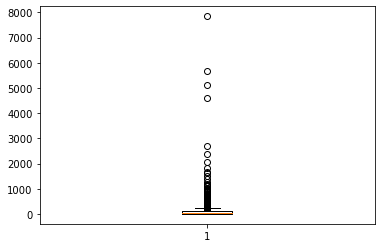

In [32]:
plt.boxplot(final['Frequency']);

In [33]:
# Removing the outliers in frequency column using standerd formula

Q1 = final['Frequency'].quantile(0.25)
Q3 = final['Frequency'].quantile(0.75)
IQR = Q3 - Q1
final = final[(final['Frequency'] >= Q1 - 1.5*IQR) & (final['Frequency'] <= Q3 + 1.5*IQR)]

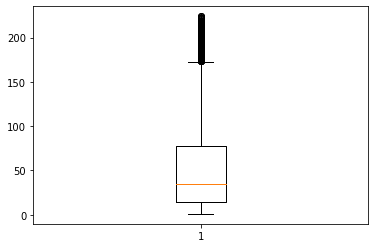

In [34]:
plt.boxplot(final['Frequency']);

#The below plot shows outliers removed from Frequency

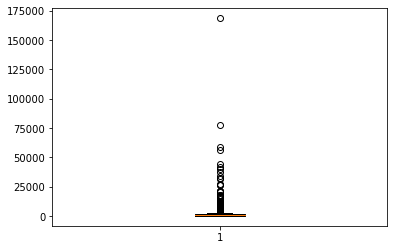

In [38]:
plt.boxplot(final['Amount']);

In [39]:
# Removing the outliers in Amount column using standerd formula

Q1 = final['Amount'].quantile(0.25)
Q3 = final['Amount'].quantile(0.75)
IQR = Q3 - Q1
final = final[(final['Amount'] >= Q1 - 1.5*IQR) & (final['Amount'] <= Q3 + 1.5*IQR)]

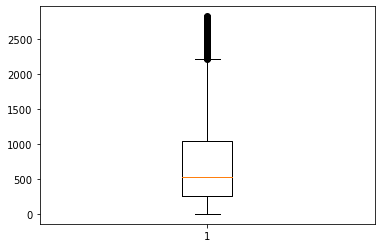

In [41]:
plt.boxplot(final['Amount']);

# The below plot shows outliers removed from Frequency

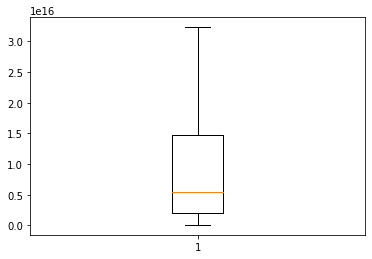

In [46]:
plt.boxplot(final['Recency']);

#the bleow plot doesnt have any outliers

In [45]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 2 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  3630 non-null   float64        
 1   Frequency   3630 non-null   int64          
 2   Amount      3630 non-null   float64        
 3   Recency     3630 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 141.8 KB


In [47]:
final = final.reset_index(drop = True)

final.tail()

,CustomerID,Frequency,Amount,Recency
3625,18278.0,9,173.90,74 days 00:52:00
3626,18280.0,10,180.60,278 days 02:58:00
3627,18281.0,7,80.82,181 days 01:57:00
3628,18282.0,12,178.05,8 days 01:07:00
3629,18287.0,70,1837.28,43 days 03:21:00


In [48]:
# Dropping the CustomerID column from final data frame and forming new dataframe final_clean

final_clean = final.drop("CustomerID", axis=1)

In [49]:
# Converting the Recency column to days for ease of calculation (removing hours).

final_clean.Recency = final_clean.Recency.dt.days

final_clean.tail()

,Frequency,Amount,Recency
3625,9,173.90,74
3626,10,180.60,278
3627,7,80.82,181
3628,12,178.05,8
3629,70,1837.28,43


__Normalization of data__

Since our data is varying in values, it is essential that we normalise it to create proper clustering. We are using StandardScaler function form sklearn library to normalise the data.

In [51]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
final_norm_array = standard_scaler.fit_transform(final_clean)

In [52]:
# We have normalised data in the below format.

final_norm_array

array([[-0.36565146,  1.6326323 , -0.29015513],
       [ 0.58286609,  1.57106235, -0.83345935],
       [-0.68182398, -0.63662888,  1.9897822 ],
       ...,
       [-0.90766149, -1.03000017,  0.73824213],
       [-0.79474274, -0.87917009, -0.94017982],
       [ 0.51511484,  1.69474519, -0.60061468]])

In [54]:
# Creating a dataframe from the normalised data with same columns as earlier.

final_norm = pd.DataFrame({'Frequency': final_norm_array[:, 0], 'Amount': final_norm_array[:, 1],'Recency': final_norm_array[:,2]})

In [55]:
final_norm.tail()

,Frequency,Amount,Recency
3625,-0.862494,-0.885608,-0.299857
3626,-0.839910,-0.875214,1.679323
3627,-0.907661,-1.030000,0.738242
3628,-0.794743,-0.879170,-0.940180
3629,0.515115,1.694745,-0.600615


<Figure size 432x288 with 0 Axes>

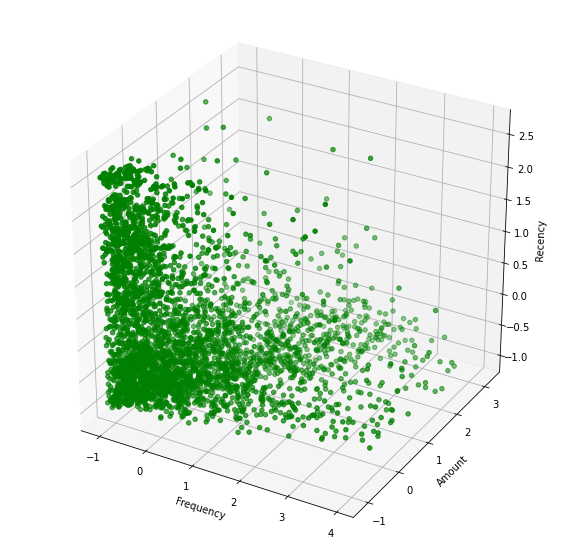

In [56]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = final_norm.Frequency,ys = final_norm.Amount,zs =  final_norm.Recency, c= 'g')

ax.set_xlabel('Frequency')
ax.set_ylabel('Amount')
ax.set_zlabel('Recency')

plt.show()

## 5. Model Building

In this section clustering is performed using the sklearn.cluster library and the inbuilt function Kmeans. The number of k here is given as 3. The normalised dataset is used to do the clustering. The cluster of each datapoint is determined and assigned to the corresponding cluster. The clusters are displayed and the total count of each cluster is taken as well.

In [58]:
# Subsetting the dataframe to perform kmeans operation into a variable called "final_norm_kmeans".

final_norm_kmeans = final_norm.loc[:,['Frequency','Amount','Recency']]

In [59]:
final_norm_kmeans.tail()

,Frequency,Amount,Recency
3625,-0.862494,-0.885608,-0.299857
3626,-0.839910,-0.875214,1.679323
3627,-0.907661,-1.030000,0.738242
3628,-0.794743,-0.879170,-0.940180
3629,0.515115,1.694745,-0.600615


In [68]:
# Importing Kmeans function from sklearn.cluster library to perform KMeans operation. 

from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=3)

#Fitting the normalised dataset to the KMeans model.

km_model.fit(final_norm_kmeans)

KMeans(n_clusters=3)

In [69]:
# Concatenating the "final_clean" dataset with labels from the model, that is the clusters. 

final_clean_kmeans = pd.concat([final_clean, pd.Series(km_model.labels_)], axis=1)

# Naming the cloumns as Frequency, Amount, Recency & Cluster.

final_clean_kmeans.columns = ['Frequency', 'Amount', 'Recency','Cluster']

In [70]:
final_clean_kmeans.tail()

,Frequency,Amount,Recency,Cluster
3625,9,173.90,74,0
3626,10,180.60,278,1
3627,7,80.82,181,1
3628,12,178.05,8,0
3629,70,1837.28,43,2


In [71]:
# Calculating the count of datapoints under each cluster using the groupby and count function.

final_clean_kmeans.groupby(["Cluster"]).Cluster.count()

Cluster
0    1866
1     946
2     818
Name: Cluster, dtype: int64

## 6. Customers Cluster Analysis

In [73]:
# Calculating the mean of the Amount, Frequency, Recency of the final_clean_kmeans dataframe 

clusters_amount = pd.DataFrame(final_clean_kmeans.groupby(["Cluster"]).Amount.mean())
clusters_frequency = pd.DataFrame(final_clean_kmeans.groupby(["Cluster"]).Frequency.mean())
clusters_recency = pd.DataFrame(final_clean_kmeans.groupby(["Cluster"]).Recency.mean())

In [74]:
#Concatinating the dataframe "final_cluster_kmeans" with clusterID. 

final_cluster_kmeans = pd.concat([pd.Series([1,2,3]), clusters_amount, clusters_frequency, clusters_recency], axis=1)

#Assigning the column names to the dataframe final_cluster_kmeans.

final_cluster_kmeans.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]

In [76]:
final_cluster_kmeans.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,1,542.258094,32.948553,53.809218
1,2,354.951342,21.054968,256.420719
2,3,1657.648753,109.905868,46.248166


__Plotting the bar graph between ClusterID and Amount_mean__

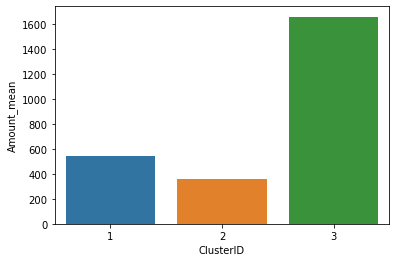

In [75]:
import seaborn as sns
sns.barplot(x=final_cluster_kmeans.ClusterID, y=final_cluster_kmeans.Amount_mean);

From the above graph we can interpret that Cluster 3 spends a lot of money on online shopping and we can provide some loyalty programs to them.

__Plotting the bar graph between ClusterID and Frequency_mean__

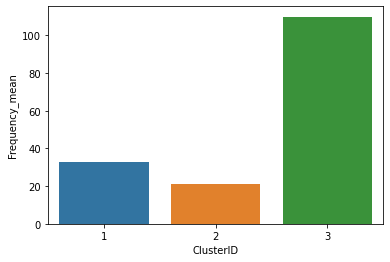

In [79]:
sns.barplot(x=final_cluster_kmeans.ClusterID, y=final_cluster_kmeans.Frequency_mean);

From the above bargraph we can interpret that cluster 1 and 2 are less frequent buyers, so we need run some e-mail campaigns to attract these customers and increase the frequency of the sales which is directly corelated to the final sales spending of the customer.

__Plotting the bar graph between ClusterID and Recency_mean__

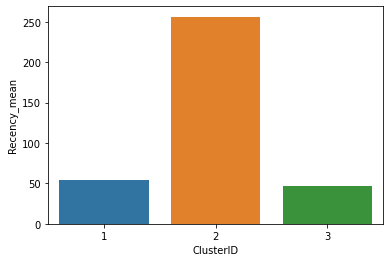

In [81]:
sns.barplot(x=final_cluster_kmeans.ClusterID, y=final_cluster_kmeans.Recency_mean);

From the above bar graph we can interpret that cluster 2 customers bought the items the long ago, so we can attract these segment of people again to the website by running the flash sales type of programs. We can also attract them with discount coupons that come with an expiry stamp.

## 7. New Customers Prediction

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a method used for clustering and regression. It is a non parametric method. In both clustering and regression, the input consists if the "k" closest training features. The output depends on the method followed. The method followed here is clustering and the output is a class membershop or cluster memebrship. A datapoint is clustered by a plurality vote of its neighbors. The datapoint is assigned to the cluster that is mos common among its k nearest neighbors. For the project K-NN is perfomed on Amount, Recency and Frequency. There are 3 clusters. When a new datapoint is added to the cluster, an insight will be provided on where exactly the new datapoint or the customer fits in and can be used in the existing target campaign /advertisement.

In [88]:
# Created the predictKNN function which takes the input of k, datapoints, dataframe and returns the cluster number

from sklearn.neighbors import KNeighborsClassifier
def predictKNN(k,inputs,dataframe):
    
    knn = KNeighborsClassifier(n_neighbors = k, p = 2) # p=2 for euclidean distance
    knn.fit(dataframe[["Frequency", "Amount","Recency"]], 
        dataframe.Cluster)

    cluster_num = knn.predict((inputs).reshape(1, -1))[0]
    cluster_name = ["cluster 1", "cluster 2", "cluster 3"]
    return cluster_name[cluster_num]

In [91]:
cluster_number = predictKNN(int(input('k: ')),np.array([int(input('Frequency: ')),
                            int(input('Amount: ')), int(input('recency: '))]),final_clean_kmeans)
print("")

print(f"New customer belongs to {cluster_number}")

k: 6


<IPython.core.display.Javascript object>

Frequency: 21
Amount: 400
recency: 270

New customer belongs to cluster 2


## 8. Project Report

As the Data Scientist for Target Online Store my main objective of the proposed research is to provide insights for target advertisements team to improve their online sales which is relatively a new platform. Target advertisements might help to increase the online sales as it focuses on the behavioural, attitude and demographical features of the customer.

Target Corporation is the eighth-largest retailer in US.[source:wikipedia]. Target currently has 40 distribution centres across the United States alone through which they cater to their needs of stores and online purchases made by customer. Similarly, they have many centres across the world. It is therefore required to have an efficient stocking, especially in online sales, of materials as stocking incurs additional cost. Target advertisment is the best method to cope up with this, as it will help us to give customers with suggestions that they are most likely to buy. It will increase the sales without having to stock on items seldom sold.

The dataset provided with has information about items(description), stock code, customerID, quantity purchased for each item and unit price along with other minor informations. The objective of the research will be achieved by the method of clustering. Different types of clustering will be performed to optimize the study.By end of this study, if a new product is added to the stock, a prediction on how frequently it will be purchased by a customer can be inferred.

In Data cleaning, we checked the dataset for any missing values and if any missing values, those were removed. The invoice date consisted of date and time in string format which is converted to DateTime data type. Also if any negative values were there in the dataset those were removed as well.

In RMF Analysis, A column monetary is created to find the total amount send by each customer. A column frequency was created to find the total number of purchases made by each customer. The final column is the recency column which determines the number of days since the last visit made by each customer. Outlier treatment has been done to all the newly created columns. Since our data is varying in values we normalized the data using standard scalar function.

In the sk learn cluster, clustering is performed with the inbuilt function provided by sklearn cluster library. The number of k is provided from the dendrograms formed which is used to do clustering. The cluster of each data point is determined and assigned to the corresponding customer. from the above function there 1884 customers in cluster 1, 784 members in cluster 2, 912 in cluster 3 which is almost equal to step by step k means.

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a method used for clustering and regression. It is a non parametric method. In both clustering and regression, the input consists if the "k" closest training features. The output depends on the method followed. The method followed here is clustering and the output is a class membershop or cluster memebrship. A datapoint is clustered by a plurality vote of its neighbors. The datapoint is assigned to the cluster that is mos common among its k nearest neighbors. For the project K-NN is perfomed on Amount, Recency and Frequency. There are 3 clusters. When a new datapoint is added to the cluster, an insight will be provided on where exactly the new datapoint or the customer fits in and can be used in the existing target campaign /advertisement.

We created a function predictKNN which takes three inputs k, data points, data frame and classifies the clusters using Euclidean distance and fits the model to the data frame and it will return the cluster to which the customer belongs. Using for loop, we tested this function with five different inputs and predicted the outcome of the cluster.

__Recommendations__

To conclude on the clusters created using RFM segmentation we calculated the mean of Amount, Frequency and Recency of the three clusters and plotted three bar graphs to compare the clusters.

+ In Amount segmentation, we found that cluster 3 spends a lit of money on online shopping and we can provide some loyalty programs to those customers.
+ From frequency segmentation, we analyzed that cluster 1 and 2 less frequent buyers, so we need to implement new marketing strategies like targeted email campaigns to attract these customers and make them buy more frequently.
+ From recency segmentation, we can conclude that cluster 2 customers did not make any purchase in recent times, we can attract them with discount coupons that come with an expiry stamp.

## 9. References

Since it quite popular dataset "Similar published works for clustering, ML,Regression found with same dataset". Many people worked on EDA, Data visuvalization,NLP and clustering according to country column in the dataset. I never used country column for my data analysis and clustering. I used a popular segmentation technique in E-commerce domain known as RFM - Recency, Frequency and Monetry. source : https://en.wikipedia.org/wiki/RFM_(customer_value) and https://towardsdatascience.com/ecom-data-cooler-series-what-is-rfm-segmentation-8c4d6c2c0fc0. And I did step by step Kmeans, KNN predection function and dendogram techniques for clustering on Customer ID which I think no one used for this dataset.